In [2]:
import numpy as np
import matplotlib.pyplot as plt

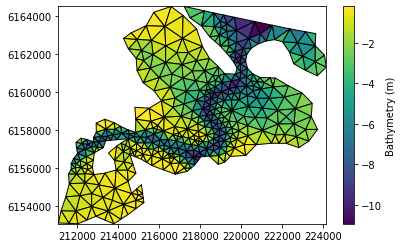

In [3]:
from mikeio import Dfsu, Mesh
meshfilename = r"C:\Program Files (x86)\DHI\2020\MIKE Zero\Examples\MIKE_3\FlowModel_FM\ELOS\Odense_Estuary\Data\Bathymetry\odense_rough.mesh"

msh = Mesh(meshfilename)
msh.plot()

# Get a list of land nodes

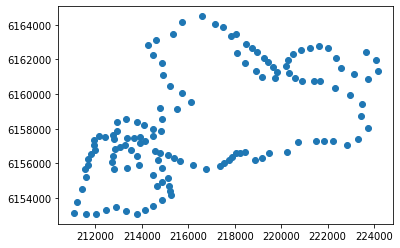

In [4]:
ncland = msh.get_node_coords(code=1)

plt.scatter(ncland[:,0], ncland[:,1])

# Get element coordinates

In [5]:
ec = msh.get_element_coords()

# Calculate distance to closest land node

In [6]:
i = 0
ne = ec.shape[0]
d = np.zeros(ne)

for i in range(ne):
    d[i] = np.min(np.sqrt((ec[i,0] - ncland[:,0])**2 + (ec[i,1] -ncland[:,1])**2))

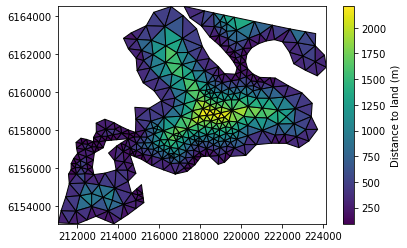

In [8]:
msh.plot(z=d,label="Distance to land (m)")

# Store result in a new Dfsu file

In [9]:
data = list()
data.append(d.reshape(1,-1))

data[0].shape

(1, 654)

In [10]:
from mikeio.eum import ItemInfo
dfs = Dfsu()
dfsufilename = r"distance.dfsu"
dfs.create(meshfilename, dfsufilename, data, items=[ItemInfo("Distance to land")])

# Clean up

In [11]:
import os
os.remove(dfsufilename)